In [1]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid

import sys
sys.path.append('../modules/')

%reload_ext autoreload
%autoreload 2

from prepare_experiments import load_config

import DG_sim_analysis_modules as sam

In [2]:
# Load HR model
dir_HR = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/double_gyre_HR/'

ds_HR = {}
oce_geom = xr.open_dataset(dir_HR + 'ocean_geometry.nc')
oce_geom =oce_geom.rename({'lonh':'xh', 'lath':'yh', 'lonq':'xq', 'latq':'yq'})
ver_coord = xr.open_dataset(dir_HR + 'Vertical_coordinate.nc')
ver_coord = ver_coord.rename({'Layer':'zl', 'Interface':'zi'})
ds_HR['prog'] = xr.open_mfdataset(dir_HR+'prog_*.nc', decode_times=False)
ds_HR['prog'] = xr.merge([ds_HR['prog'], oce_geom, ver_coord])
ds_HR['oce_stats'] = xr.open_dataset(dir_HR +'ocean.stats.nc', decode_times=False)

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [3]:
ds_HR['prog'] = sam.add_energy_metrics(ds_HR['prog']) 

In [16]:
ds_filt_coarse = xr.open_dataset('/scratch/db194/mom6/base_experiments_2025/DoubleGyre/double_gyre_HR/prog_filt_100km.nc')

In [4]:
res = [10, 20, 40, 80]
C_ANN = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
C_GM = np.array([10, 50, 100, 200, 500])/1000
model_types = ['ANN','GM1000']
exp_dir = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/31Mar/'

In [5]:
res_bins = [5, 15, 30, 60, 100]
C_ANN_bins = np.array([-0.1, 0.125, 0.325, 0.625, 0.825, 1.125])
C_GM_bins = np.array([0, 25, 75, 150, 350, 750])

In [6]:
%%time
exp_tree = sam.load_sims(exp_dir, model_types, res, C_ANN, C_GM)

Reading :res_10km_ANN_0.0
Reading :res_10km_ANN_0.25
Reading :res_10km_ANN_0.5
Reading :res_10km_ANN_0.75
Reading :res_10km_ANN_1.0
Reading :res_20km_ANN_0.0
Reading :res_20km_ANN_0.25
Reading :res_20km_ANN_0.5
Reading :res_20km_ANN_0.75
Reading :res_20km_ANN_1.0
Reading :res_40km_ANN_0.0
Reading :res_40km_ANN_0.25
Reading :res_40km_ANN_0.5
Reading :res_40km_ANN_0.75
Reading :res_40km_ANN_1.0
Reading :res_80km_ANN_0.0
Reading :res_80km_ANN_0.25
Reading :res_80km_ANN_0.5
Reading :res_80km_ANN_0.75
Reading :res_80km_ANN_1.0
Reading :res_10km_GM1000_0.01
Reading :res_10km_GM1000_0.05
Reading :res_10km_GM1000_0.1
Reading :res_10km_GM1000_0.2
Reading :res_10km_GM1000_0.5
Reading :res_20km_GM1000_0.01
Reading :res_20km_GM1000_0.05
Reading :res_20km_GM1000_0.1
Reading :res_20km_GM1000_0.2
Reading :res_20km_GM1000_0.5
Reading :res_40km_GM1000_0.01
Reading :res_40km_GM1000_0.05
Reading :res_40km_GM1000_0.1
Reading :res_40km_GM1000_0.2
Reading :res_40km_GM1000_0.5
Reading :res_80km_GM1000_0.01
R

In [7]:
exp_tree = exp_tree.map_over_subtree(sam.add_energy_metrics)

# KE 

In [9]:
Tsel = slice(3*360, None)

In [10]:
MKE_HR = ds_HR['prog'].MKE.values
EKE_HR = ds_HR['prog'].EKE.sel(Time=Tsel).mean().values

MAPE_HR = ds_HR['prog'].MAPE.values
EAPE_HR = ds_HR['prog'].EAPE.sel(Time=Tsel).mean().values

In [11]:
print(MKE_HR, EKE_HR, MAPE_HR, EAPE_HR)

6268803639079903.0 1.0499452322769256e+16 7.384027666649318e+16 9633059412723494.0


In [12]:
%%time
MKE_ANN = np.zeros((len(res), len(C_ANN)))
EKE_ANN = np.zeros((len(res), len(C_ANN)))

MAPE_ANN = np.zeros((len(res), len(C_ANN)))
EAPE_ANN = np.zeros((len(res), len(C_ANN)))


for i, r in enumerate(res): 
    
    for j, c in enumerate(C_ANN):
        print(r, c)
        
        MKE_ANN[i,j] =  exp_tree['ANN'][str(r)][str(c)]['prog'].MKE.values
        EKE_ANN[i,j] =  exp_tree['ANN'][str(r)][str(c)]['prog'].EKE.sel(Time=Tsel).mean('Time').values

        MAPE_ANN[i,j] =  exp_tree['ANN'][str(r)][str(c)]['prog'].MAPE.values
        EAPE_ANN[i,j] =  exp_tree['ANN'][str(r)][str(c)]['prog'].EAPE.sel(Time=Tsel).mean('Time').values
        

10 0.0
10 0.25
10 0.5
10 0.75
10 1.0
20 0.25
20 0.5
20 0.75
20 1.0
40 0.0
40 0.25
40 0.5
40 0.75
40 1.0
80 0.0
80 0.25
80 0.5
80 0.75
80 1.0
CPU times: user 5min 4s, sys: 2min 9s, total: 7min 14s
Wall time: 28min 2s


In [ ]:
%%time
MKE_GM = np.zeros((len(res), len(C_GM)))
EKE_GM = np.zeros((len(res), len(C_GM)))

MAPE_GM = np.zeros((len(res), len(C_GM)))
EAPE_GM = np.zeros((len(res), len(C_GM)))

Tsel = slice(3*360, None)

for i, r in enumerate(res): 
    
    for j, c in enumerate(C_GM):
        print(r, c)
        
        MKE_GM[i,j] =  exp_tree['GM1000'][str(r)][str(c)]['prog'].MKE.values
        EKE_GM[i,j] =  exp_tree['GM1000'][str(r)][str(c)]['prog'].EKE.sel(Time=Tsel).mean('Time').values

        MAPE_GM[i,j] =  exp_tree['GM1000'][str(r)][str(c)]['prog'].MAPE.values
        EAPE_GM[i,j] =  exp_tree['GM1000'][str(r)][str(c)]['prog'].EAPE.sel(Time=Tsel).mean('Time').values

10 0.01
10 0.05
10 0.1
10 0.2
10 0.5


In [14]:
2+2

4

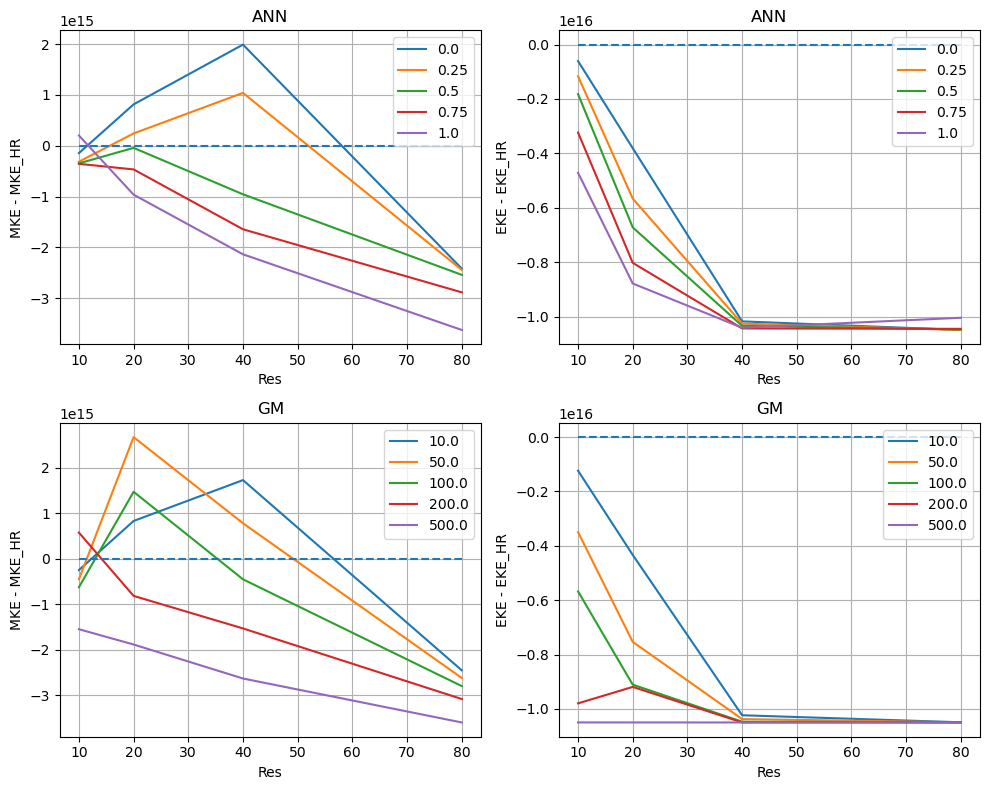

In [15]:
plt.figure(figsize=(10,8))

plt.subplot(221)
for i, c in enumerate(C_ANN):
    plt.plot(res, MKE_ANN[:,i] - MKE_HR, label=c)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)

#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('MKE - MKE_HR')
plt.title('ANN')

plt.subplot(222)
for i, c in enumerate(C_ANN):
    plt.plot(res, EKE_ANN[:,i] - EKE_HR, label=c)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)
#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('EKE - EKE_HR')
plt.title('ANN')

plt.subplot(223)
for i, c in enumerate(C_GM):
    plt.plot(res, MKE_GM[:,i] - MKE_HR, label=c*1000)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)

#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('MKE - MKE_HR')
plt.title('GM')

plt.subplot(224)
for i, c in enumerate(C_GM):
    plt.plot(res, EKE_GM[:,i] - EKE_HR, label=c*1000)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)
#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('EKE - EKE_HR')
plt.title('GM')

plt.tight_layout()

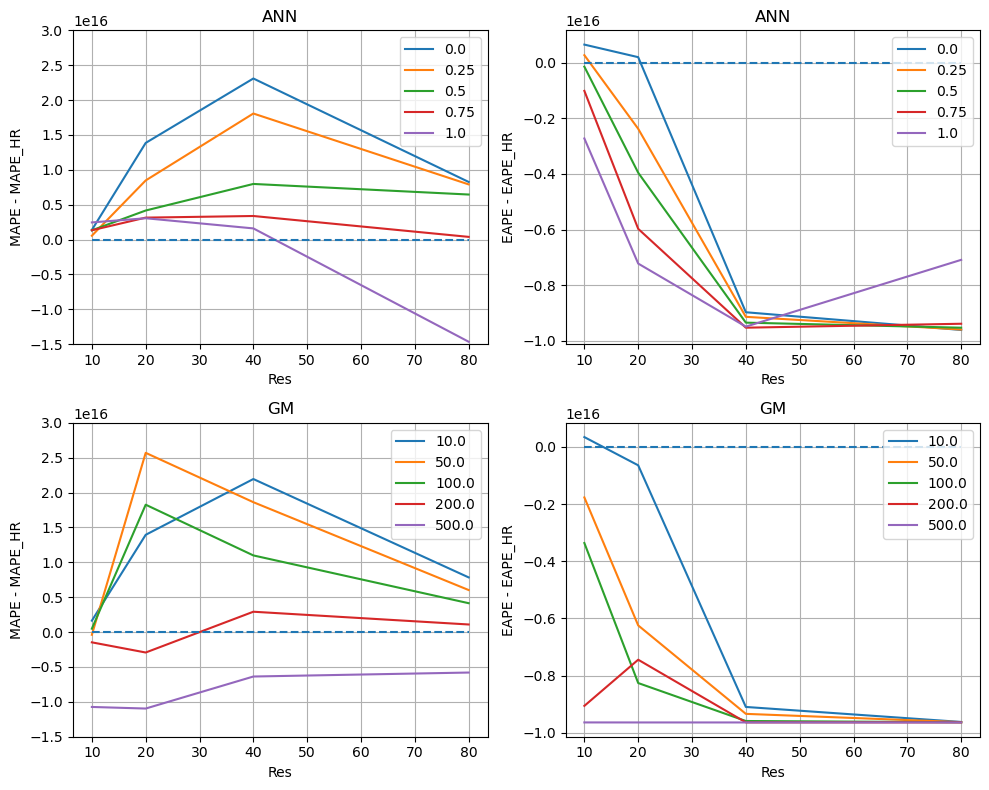

In [47]:
plt.figure(figsize=(10,8))

plt.subplot(221)
for i, c in enumerate(C_ANN):
    plt.plot(res, MAPE_ANN[:,i] - MAPE_HR, label=c)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)

plt.ylim([-1.5e16, 3e16])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('MAPE - MAPE_HR')
plt.title('ANN')

plt.subplot(222)
for i, c in enumerate(C_ANN):
    plt.plot(res, EAPE_ANN[:,i] - EAPE_HR, label=c)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)
#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('EAPE - EAPE_HR')
plt.title('ANN')

plt.subplot(223)
for i, c in enumerate(C_GM):
    plt.plot(res, MAPE_GM[:,i] - MAPE_HR, label=c*1000)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)

#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('MAPE - MAPE_HR')
plt.title('GM')
plt.ylim([-1.5e16, 3e16])

plt.subplot(224)
for i, c in enumerate(C_GM):
    plt.plot(res, EAPE_GM[:,i] - EAPE_HR, label=c*1000)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)
#plt.ylim([0, .33])
plt.hlines(0, 10, 80, linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Res')
plt.ylabel('EAPE - EAPE_HR')
plt.title('GM')

plt.tight_layout()

# Error in mean state

In [18]:
exp_tree = exp_tree.map_over_subtree(sam.ave_e)

In [19]:
e_mean_HR = ds_HR['prog'].e.sel(Time=slice(360*3, None)).mean('Time')

err_eta_ANN = np.zeros((len(res), len(C_ANN)))
zi = 0

for i, r in enumerate(res): 

    ds = exp_tree['ANN'][str(r)]['0.0']['prog']
    coarsen_points = int(len(e_mean_HR.xh)/len(ds.xh)) 

    xh_LR = ds.xh
    yh_LR = ds.yh
    
    e_mean_HR_coarse = e_mean_HR.coarsen(xh=coarsen_points, yh=coarsen_points, boundary='trim').mean().interp(xh=xh_LR, yh=yh_LR)
    
    for j, c in enumerate(C_ANN):
        
        err_eta_ANN[i][j] =  ( ( (exp_tree['ANN'][str(r)][str(c)]['ave_prog'].ave_e - 
                                e_mean_HR_coarse)**2).isel(zi=zi).mean(['xh','yh'])**0.5).values

In [20]:
err_eta_GM = np.zeros((len(res), len(C_GM)))
zi = 0

for i, r in enumerate(res): 

    ds = exp_tree['ANN'][str(r)]['0.0']['prog']
    coarsen_points = int(len(e_mean_HR.xh)/len(ds.xh)) 

    xh_LR = ds.xh
    yh_LR = ds.yh
    
    e_mean_HR_coarse = e_mean_HR.coarsen(xh=coarsen_points, yh=coarsen_points, boundary='trim').mean().interp(xh=xh_LR, yh=yh_LR)
    
    for j, c in enumerate(C_GM):
        
        err_eta_GM[i][j] =  ( ( (exp_tree['GM1000'][str(r)][str(c)]['ave_prog'].ave_e - 
                                e_mean_HR_coarse)**2).isel(zi=zi).mean(['xh','yh'])**0.5).values

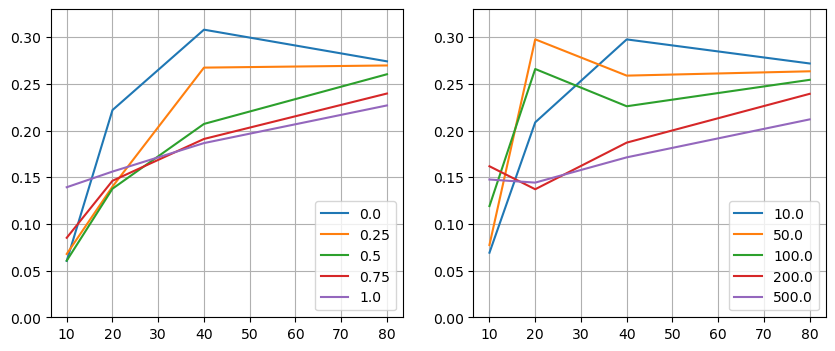

In [21]:
plt.figure(figsize=(10,4))

plt.subplot(121)
for i, c in enumerate(C_ANN):
    plt.plot(res, err_eta_ANN[:,i], label=c)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)

plt.ylim([0, .33])
plt.legend()
plt.grid()

plt.subplot(122)
for i, c in enumerate(C_GM):
    plt.plot(res, err_eta_GM[:,i], label=c*1000)
    #plt.plot(C_ANN, err_eta_GM[i,:], label=r)
plt.ylim([0, .33])
plt.legend()
plt.grid()

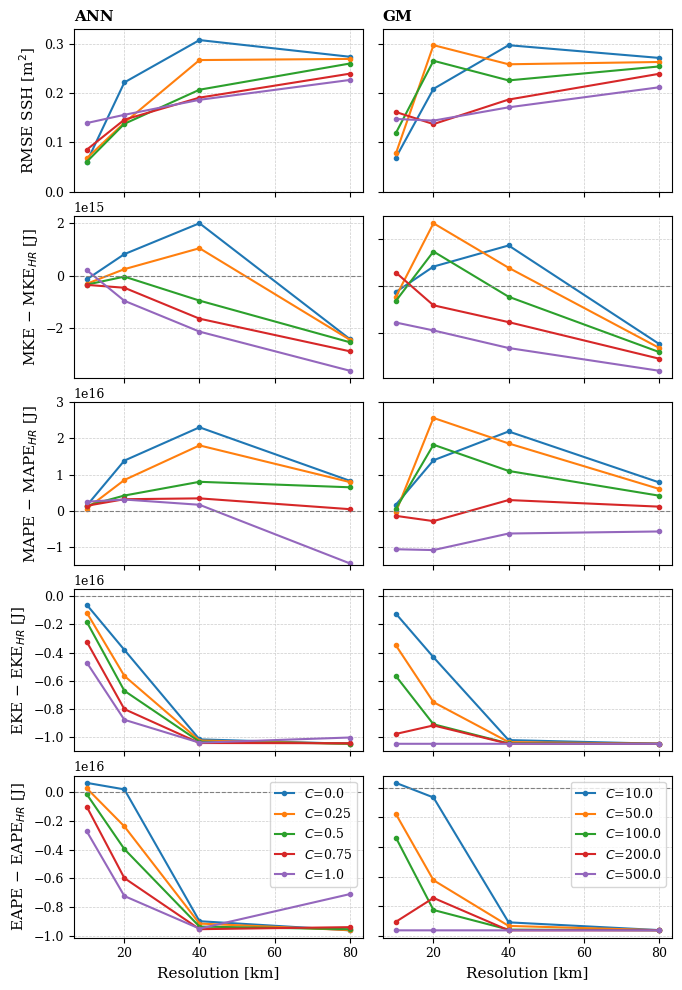

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Publication-style settings
mpl.rcParams.update({
    "font.size": 10,
    "font.family": "serif",
    "axes.labelsize": 11,
    "axes.titlesize": 11,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 1.5,
    "axes.grid": True,
    "grid.color": "0.8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

fig, axes = plt.subplots(5, 2, figsize=(7, 10), sharex=True)

titles = ['ANN', 'GM'] * 5
ylabels = [
    'RMSE SSH [m$^2$]', 'RMSE SSH [m$^2$]',
    'MKE $-$ MKE$_{HR}$ [J]', 'MKE $-$ MKE$_{HR}$ [J]',
    'MAPE $-$ MAPE$_{HR}$ [J]', 'MAPE $-$ MAPE$_{HR}$ [J]',
    'EKE $-$ EKE$_{HR}$ [J]', 'EKE $-$ EKE$_{HR}$ [J]',
    'EAPE $-$ EAPE$_{HR}$ [J]', 'EAPE $-$ EAPE$_{HR}$ [J]'
]

datasets = [
    (err_eta_ANN, C_ANN), (err_eta_GM, [c * 1000 for c in C_GM]),
    (MKE_ANN - MKE_HR, C_ANN), (MKE_GM - MKE_HR, [c * 1000 for c in C_GM]),
    (MAPE_ANN - MAPE_HR, C_ANN), (MAPE_GM - MAPE_HR, [c * 1000 for c in C_GM]),
    (EKE_ANN - EKE_HR, C_ANN), (EKE_GM - EKE_HR, [c * 1000 for c in C_GM]),
    (EAPE_ANN - EAPE_HR, C_ANN), (EAPE_GM - EAPE_HR, [c * 1000 for c in C_GM])
]

ylim_overrides = {
    0: [0, 0.33], 1: [0, 0.33],
    4: [-1.5e16, 3e16], 5: [-1.5e16, 3e16]
}

for idx, ax in enumerate(axes.flat):
    data, coeffs = datasets[idx]
    for i, c in enumerate(coeffs):
        ax.plot(res, data[:, i] if data.ndim == 2 else data[:, i],
                label=rf'$C$={c}', marker='o', markersize=3)

    if idx<2:
        ax.set_title(titles[idx], loc='left', fontsize=11, fontweight='bold')
    ax.set_ylabel(ylabels[idx])
    ax.axhline(0, linestyle='--', color='gray', linewidth=0.8)
    ax.label_outer()  # hide inner x/y labels

    if idx in ylim_overrides:
        ax.set_ylim(ylim_overrides[idx])

    if idx >= 8:  # right column
        ax.legend(loc='upper right', frameon=True, handlelength=1.5)

# Shared X label
for ax in axes[-1, :]:
    ax.set_xlabel('Resolution [km]')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

# Optional: save to file
plt.savefig("DG_model_comparison.pdf", dpi=300, bbox_inches='tight')

